# Assignment 1 : Python Data Analysis using salaries dataset

#Damion Samuels

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [8]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [9]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [10]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [13]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [12]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [14]:
df_sex=df[['sex', 'salary']]
df_sex

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [15]:
print(df_sex[df_sex['sex']=='Male'])

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[358 rows x 2 columns]


In [16]:
print(df_sex[df_sex['sex']=='Male'].median())

salary    108043.0
dtype: float64


Finding the Median salary for all females

In [17]:
print(df_sex[df_sex['sex']=='Female'].max())

sex       Female
salary    161101
dtype: object


Comparing the Mean salary of Males and Females

In [18]:
df_mean=df_sex.groupby(by='sex')['salary'].mean()
df_mean

sex
Female    101002.410256
Male      115090.418994
Name: salary, dtype: float64

In [25]:
# The difference between mean salaries of male and female
df_mean_male = df_sex[df_sex['sex']=='Male'].mean()
df_mean_female = df_sex[df_sex['sex']=='Female'].mean()
print(df_mean_male-df_mean_female)

salary    14088.008738
dtype: float64


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [29]:
df_exp=df[['yrs.service','salary']]
df_exp

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
...,...,...
392,30,103106
393,19,150564
394,25,101738
395,15,95329


In [30]:
df_exp[df_exp['yrs.service']==20]

,yrs.service,salary
8,20,119250
16,20,101000
82,20,144640
94,20,123683
173,20,134185
209,20,163200
223,20,129600
225,20,122400
353,20,138000
371,20,110515


In [31]:
df_exp[df_exp['yrs.service']==20].count()

yrs.service    10
salary         10
dtype: int64

In [32]:
print(df_exp[df_exp['yrs.service']==20].mean())

yrs.service        20.0
salary         128647.3
dtype: float64


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [34]:
df_exp[df_exp['yrs.service']>=20],df_exp[df_exp['yrs.service']<20]

(     yrs.service  salary
 3             39  115000
 4             41  141500
 6             23  175000
 7             45  147765
 8             20  119250
 ..           ...     ...
 384           21  125192
 386           27  139219
 388           36  119450
 392           30  103106
 394           25  101738
 
 [157 rows x 2 columns],      yrs.service  salary
 0             18  139750
 1             16  173200
 2              3   79750
 5              6   97000
 9             18  129000
 ..           ...     ...
 390           19  166605
 391           19  151292
 393           19  150564
 395           15   95329
 396            4   81035
 
 [240 rows x 2 columns])

In [35]:
df_exp[df_exp['yrs.service']>=20].describe()

,yrs.service,salary
count,157.000000,157.000000
mean,31.057325,122520.656051
std,8.633746,29674.689571
min,20.000000,57800.000000
25%,23.000000,101036.000000
50%,30.000000,119450.000000
75%,37.000000,142500.000000
max,60.000000,231545.000000


In [36]:
df_exp[df_exp['yrs.service']<20].describe()

,yrs.service,salary
count,240.000000,240.000000
mean,8.820833,107940.504167
std,5.938068,29340.919333
min,0.000000,63100.000000
25%,3.000000,84435.000000
50%,8.000000,103725.000000
75%,14.000000,124412.500000
max,19.000000,204000.000000


People who have salary of greater than or equal to 200,000

In [38]:
df_greater = df_sex[['salary']]
df_greater

,salary
0,139750
1,173200
2,79750
3,115000
4,141500
...,...
392,103106
393,150564
394,101738
395,95329


In [39]:
df_greater[df_greater['salary']>=200000].count()

salary    3
dtype: int64

Your Findings here...


**Findings from Data:** <br>

The overall average salary is $113,706.46.

This is 1.22% below the average salary for men at $115,090.41.

However, it is more than the average salary for women at $101,002.41.

# Rename values, subset columns, etc

In [40]:
rename_df = df.rename(columns={'Unnamed: 0':'default_i','rank':'position','yrs.service':'yrs.experience'})
rename_df

,default_i,position,discipline,yrs.since.phd,yrs.experience,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [41]:
rename_df.groupby(['discipline']).count()

,default_i,position,yrs.since.phd,yrs.experience,sex,salary
discipline,,,,,,
A,181,181,181,181,181,181
B,216,216,216,216,216,216


In [42]:
rename_df.groupby(['sex']).count()

,default_i,position,discipline,yrs.since.phd,yrs.experience,salary
sex,,,,,,
Female,39,39,39,39,39,39
Male,358,358,358,358,358,358


# Create some simple visualizations showing some simple statistics

In [56]:
import matplotlib.pyplot as plot
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff69f246150>,
      dtype=object)

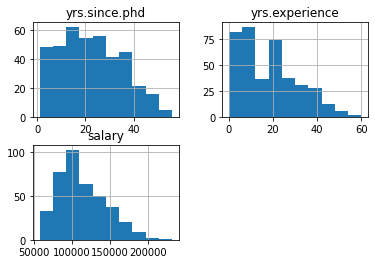

In [57]:
rename_df.hist()

In [ ]:
del rename_df['default_i']

In [60]:
new_name_df=rename_df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff69f0e50d0>,
      dtype=object)

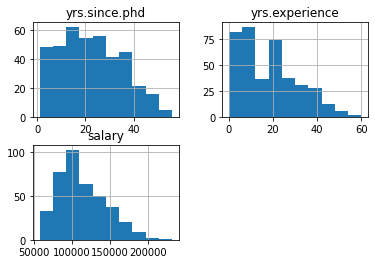

In [61]:
new_name_df.hist()

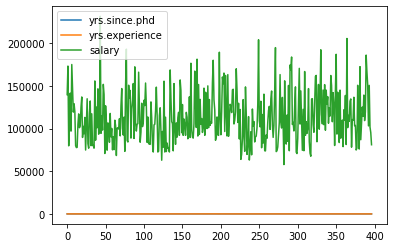

In [62]:
new_name_df.plot()

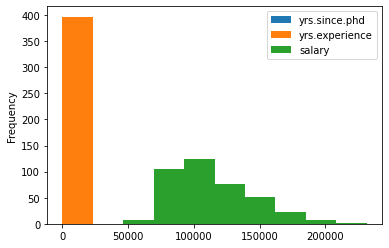

In [63]:
new_name_df.plot(kind='hist')

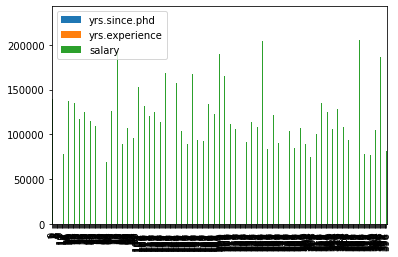

In [64]:
new_name_df.plot(kind='bar')

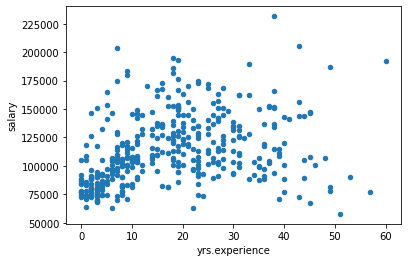

In [65]:
new_name_df.plot(kind='scatter', x='yrs.experience', y='salary')

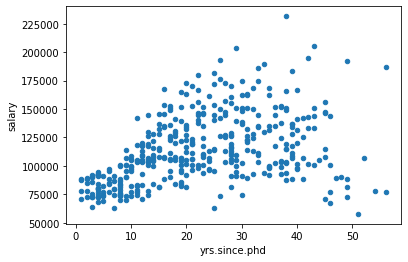

In [66]:
new_name_df.plot(kind='scatter', x='yrs.since.phd', y='salary')

Your observations from the visuals: 

**My Observations from the Visual Data** <br>

It is observed that salary is skewed to the right. <br>
It is also observed that its mean of $113,706.46 is greater than it's mean of 107,300.00

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...



I also discovered that the -

 Your Findings here...





**My Conclusions:** <br>

On average men earn $14,088.01 more than women. For every Dollar a man earns, a woman earns 86 Cents.

The highest earning individual is a man who earns $231,545.00 which is 43.73% more than the highest earning woman at 161,101.